<a href="https://colab.research.google.com/github/VigRAN084/EpsilonGreedyAlgorithm/blob/main/EpsilonGreedyAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

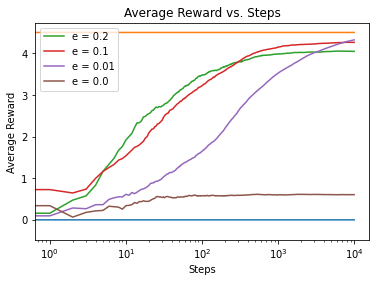

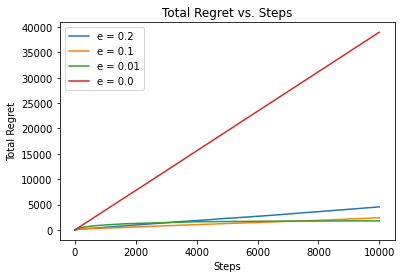

In [67]:
'''
Vignesh Rangarajan
Epsilon-Greedy Algorithm
'''

import numpy as np
import matplotlib.pyplot as plt
  

class Decision:
  def __init__(self, sampleMean):
    #sample mean amongst past selections of the arm
    self.sampleMean = sampleMean
    #mean of the reward distribution 
    self.mean = 0
    #number of selections
    self.N = 0
    
  def getReward(self): 
    #generate reward from the normal distribution of the arm
    return  self.sampleMean +  np.random.randn() 
  
  def changeAvgReward(self, r):
    #increment the number of 
    self.N += 1
    self.mean =  1.0 / self.N * r + (self.mean - 1.0 / self.N * self.mean) 

def simulation(epsilon, N):
  #potential decisions and their rewards
  decisions = [Decision(0.0),
               Decision(0.5), 
               Decision(1.0),
               Decision(1.5),
               Decision(2.0),
               Decision(2.5),
               Decision(3.0),
               Decision(3.5),
               Decision(4.0),
               Decision(4.5)]
  
  data = np.empty(N)
  tempCounts = np.empty(N)
  maxRewards = np.empty(N)
  for i in range(N):
    #exploration when probability less than epsilon
    if np.random.random() < epsilon:
      index = np.random.choice(10)
    #exploitation when probability greater than epsilon
    #uses arm with the maximum mean value
    else:
      index = np.argmax([d.mean for d in decisions])
    #arm selection
    tempReward = decisions[index].getReward()
    decisions[index].changeAvgReward(tempReward)
  
    data[i] = tempReward
    tempCounts[i] = i+1

    #maximum value each time
    max = tempReward
    for i in range (len(decisions)):
      if (i == index):
        continue
      else:
        x = decisions[i].getReward()
        if x > max:
          max = x
    maxRewards[i] = max
  #generates avg reward after each successive selection
  actionValEstimate = np.cumsum(data) / (np.arange(N) + 1)
  #plotting data
  return actionValEstimate
if __name__ == '__main__':
  #Action Value and Regret for e = 0.2
  actionVal1 = 0.0
  for i in range(10):
    actionVal1 += simulation(0.2, 10000)
  actionVal1 /= 10.0
  regret1 = (4.5 * (np.arange(10000) + 1)) - actionVal1 * (np.arange(10000) + 1)


  #Action Value and Regret for e = 0.1
  actionVal2 = 0.0
  for i in range(10):
    actionVal2 += simulation(0.1, 10000)
  actionVal2 /= 10.0
  regret2 = (4.5 * (np.arange(10000) + 1)) - actionVal2 * (np.arange(10000) + 1)

  #Action Value and Regret for e = 0.01
  actionVal3 = 0.0
  for i in range(10):
    actionVal3 += simulation(0.01, 10000)
  actionVal3 /= 10.0
  regret3 = (4.5 * (np.arange(10000) + 1)) - actionVal3 * (np.arange(10000) + 1)

  #Action Value and Regret for e = 0.0
  actionVal4 = 0.0
  for i in range(10):
    actionVal4 += simulation(0.0, 10000)
  actionVal4 /= 10.0
  regret4 = (4.5 * (np.arange(10000) + 1)) - actionVal4 * (np.arange(10000) + 1)

  #Graph the average reward and the total regret
  plt.plot(np.ones(10000)*0)
  plt.plot(np.ones(10000)*4.5)
  plt.plot(actionVal1, label = 'e = 0.2')
  plt.plot(actionVal2, label = 'e = 0.1')
  plt.plot(actionVal3, label = 'e = 0.01')
  plt.plot(actionVal4, label = 'e = 0.0')
  plt.title('Average Reward vs. Steps')
  plt.legend(loc="upper left")
  plt.xlabel('Steps')
  plt.ylabel('Average Reward')
  plt.xscale('log')
  plt.show()

  plt.plot(regret1, label = 'e = 0.2')
  plt.plot(regret2, label = 'e = 0.1')
  plt.plot(regret3, label = 'e = 0.01')
  plt.plot(regret4, label = 'e = 0.0')
  plt.title('Total Regret vs. Steps')
  plt.legend(loc="upper left")
  plt.xlabel('Steps')
  plt.ylabel('Total Regret')
  plt.xscale('linear')
  plt.show()